In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

In [4]:
from matplotlib import font_manager, rc

plt.rc("font", family = "Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings(action="ignore")

### 산엽별 오염물질 배출량

In [6]:
### 데이터 불러오기
# 2020년 배출량 (단위:kg/yr)
# TSP(미세먼지 총량), PM-2.5(미세먼지2.5마이크론),PM-10(미세먼지10마이크론),SOx(일산화황),
# NOx(산화질소),VOCs(휘발성유기화합물),NH3(암모니아),CO(일산화탄소),BC(흑탄소)
df = pd.read_excel("./data/2020년_통합검색_배출량.xlsx",
              usecols="C:M")
df

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,대분류,대분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
1,에너지산업 연소,무연탄,18150.7243,5501.93834,10563.7216,1454715.62618,458077.59001,145674.06345,271.92492,291348.1269,103.24938
2,에너지산업 연소,유연탄,1882536.00228,1451566.24686,1822191.11539,25587736.9289,28423781.27649,2420139.01731,22587.96433,20167825.14425,27240.09217
3,에너지산업 연소,B-A유,13.27227,5.74817,10.60452,171.46874,301448.71416,113.55546,87.21054,545.0658,0.05748
4,에너지산업 연소,B-C유,38834.38952,10474.46038,24261.59926,1126876.38013,1750398.51886,138785.02751,71381.69737,789292.17258,104.74461
5,에너지산업 연소,경유,7461.07434,962.89413,6148.01742,68161.2814,232339.48298,726.31887,2153.62292,12879.24561,125.30428
6,에너지산업 연소,등유,17457.55016,5233.74347,14384.91268,24597.85553,308438.80859,2128.74405,6811.98102,42425.14371,523.37435
7,에너지산업 연소,LPG,8192.23285,8192.23285,8192.23285,1693.725,57035.29593,10864.46568,2353.96761,69532.58035,3145.81743
8,에너지산업 연소,LNG,904336.83188,904336.83188,904336.83188,280557.40646,15986853.09047,5390108.84871,1318418.3898,39806190.76927,347265.34344
9,에너지산업 연소,고형연료,46140.72419,34726.59513,42308.6963,57056.35488,1538726.30374,8395.62935,664364.77178,389822.42419,NaN


In [7]:
df=df.rename(columns=df.iloc[0])

In [8]:
df

,대분류,대분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
0,대분류,대분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
1,에너지산업 연소,무연탄,18150.7243,5501.93834,10563.7216,1454715.62618,458077.59001,145674.06345,271.92492,291348.1269,103.24938
2,에너지산업 연소,유연탄,1882536.00228,1451566.24686,1822191.11539,25587736.9289,28423781.27649,2420139.01731,22587.96433,20167825.14425,27240.09217
3,에너지산업 연소,B-A유,13.27227,5.74817,10.60452,171.46874,301448.71416,113.55546,87.21054,545.0658,0.05748
4,에너지산업 연소,B-C유,38834.38952,10474.46038,24261.59926,1126876.38013,1750398.51886,138785.02751,71381.69737,789292.17258,104.74461
5,에너지산업 연소,경유,7461.07434,962.89413,6148.01742,68161.2814,232339.48298,726.31887,2153.62292,12879.24561,125.30428
6,에너지산업 연소,등유,17457.55016,5233.74347,14384.91268,24597.85553,308438.80859,2128.74405,6811.98102,42425.14371,523.37435
7,에너지산업 연소,LPG,8192.23285,8192.23285,8192.23285,1693.725,57035.29593,10864.46568,2353.96761,69532.58035,3145.81743
8,에너지산업 연소,LNG,904336.83188,904336.83188,904336.83188,280557.40646,15986853.09047,5390108.84871,1318418.3898,39806190.76927,347265.34344
9,에너지산업 연소,고형연료,46140.72419,34726.59513,42308.6963,57056.35488,1538726.30374,8395.62935,664364.77178,389822.42419,NaN


In [9]:
df=df.drop(0)

In [10]:

df

,대분류,대분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
1,에너지산업 연소,무연탄,18150.7243,5501.93834,10563.7216,1454715.62618,458077.59001,145674.06345,271.92492,291348.1269,103.24938
2,에너지산업 연소,유연탄,1882536.00228,1451566.24686,1822191.11539,25587736.9289,28423781.27649,2420139.01731,22587.96433,20167825.14425,27240.09217
3,에너지산업 연소,B-A유,13.27227,5.74817,10.60452,171.46874,301448.71416,113.55546,87.21054,545.0658,0.05748
4,에너지산업 연소,B-C유,38834.38952,10474.46038,24261.59926,1126876.38013,1750398.51886,138785.02751,71381.69737,789292.17258,104.74461
5,에너지산업 연소,경유,7461.07434,962.89413,6148.01742,68161.2814,232339.48298,726.31887,2153.62292,12879.24561,125.30428
6,에너지산업 연소,등유,17457.55016,5233.74347,14384.91268,24597.85553,308438.80859,2128.74405,6811.98102,42425.14371,523.37435
7,에너지산업 연소,LPG,8192.23285,8192.23285,8192.23285,1693.725,57035.29593,10864.46568,2353.96761,69532.58035,3145.81743
8,에너지산업 연소,LNG,904336.83188,904336.83188,904336.83188,280557.40646,15986853.09047,5390108.84871,1318418.3898,39806190.76927,347265.34344
9,에너지산업 연소,고형연료,46140.72419,34726.59513,42308.6963,57056.35488,1538726.30374,8395.62935,664364.77178,389822.42419,NaN
10,에너지산업 연소,기타,140556.24992,NaN,NaN,2203712.71622,4238323.27692,NaN,NaN,38974.752,NaN


In [11]:
df.columns.values[1] = '소분류'

In [12]:
###데이터 가공 완성
df

,대분류,소분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
1,에너지산업 연소,무연탄,18150.7243,5501.93834,10563.7216,1454715.62618,458077.59001,145674.06345,271.92492,291348.1269,103.24938
2,에너지산업 연소,유연탄,1882536.00228,1451566.24686,1822191.11539,25587736.9289,28423781.27649,2420139.01731,22587.96433,20167825.14425,27240.09217
3,에너지산업 연소,B-A유,13.27227,5.74817,10.60452,171.46874,301448.71416,113.55546,87.21054,545.0658,0.05748
4,에너지산업 연소,B-C유,38834.38952,10474.46038,24261.59926,1126876.38013,1750398.51886,138785.02751,71381.69737,789292.17258,104.74461
5,에너지산업 연소,경유,7461.07434,962.89413,6148.01742,68161.2814,232339.48298,726.31887,2153.62292,12879.24561,125.30428
6,에너지산업 연소,등유,17457.55016,5233.74347,14384.91268,24597.85553,308438.80859,2128.74405,6811.98102,42425.14371,523.37435
7,에너지산업 연소,LPG,8192.23285,8192.23285,8192.23285,1693.725,57035.29593,10864.46568,2353.96761,69532.58035,3145.81743
8,에너지산업 연소,LNG,904336.83188,904336.83188,904336.83188,280557.40646,15986853.09047,5390108.84871,1318418.3898,39806190.76927,347265.34344
9,에너지산업 연소,고형연료,46140.72419,34726.59513,42308.6963,57056.35488,1538726.30374,8395.62935,664364.77178,389822.42419,NaN
10,에너지산업 연소,기타,140556.24992,NaN,NaN,2203712.71622,4238323.27692,NaN,NaN,38974.752,NaN


In [13]:
df_fire=df[df["대분류"]=="에너지산업 연소"]

In [14]:
df_fire

,대분류,소분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
1,에너지산업 연소,무연탄,18150.7243,5501.93834,10563.7216,1454715.62618,458077.59001,145674.06345,271.92492,291348.1269,103.24938
2,에너지산업 연소,유연탄,1882536.00228,1451566.24686,1822191.11539,25587736.9289,28423781.27649,2420139.01731,22587.96433,20167825.14425,27240.09217
3,에너지산업 연소,B-A유,13.27227,5.74817,10.60452,171.46874,301448.71416,113.55546,87.21054,545.0658,0.05748
4,에너지산업 연소,B-C유,38834.38952,10474.46038,24261.59926,1126876.38013,1750398.51886,138785.02751,71381.69737,789292.17258,104.74461
5,에너지산업 연소,경유,7461.07434,962.89413,6148.01742,68161.2814,232339.48298,726.31887,2153.62292,12879.24561,125.30428
6,에너지산업 연소,등유,17457.55016,5233.74347,14384.91268,24597.85553,308438.80859,2128.74405,6811.98102,42425.14371,523.37435
7,에너지산업 연소,LPG,8192.23285,8192.23285,8192.23285,1693.725,57035.29593,10864.46568,2353.96761,69532.58035,3145.81743
8,에너지산업 연소,LNG,904336.83188,904336.83188,904336.83188,280557.40646,15986853.09047,5390108.84871,1318418.3898,39806190.76927,347265.34344
9,에너지산업 연소,고형연료,46140.72419,34726.59513,42308.6963,57056.35488,1538726.30374,8395.62935,664364.77178,389822.42419,NaN
10,에너지산업 연소,기타,140556.24992,NaN,NaN,2203712.71622,4238323.27692,NaN,NaN,38974.752,NaN


In [15]:
df_fire.iloc[:,:2]

,대분류,소분류
1,에너지산업 연소,무연탄
2,에너지산업 연소,유연탄
3,에너지산업 연소,B-A유
4,에너지산업 연소,B-C유
5,에너지산업 연소,경유
6,에너지산업 연소,등유
7,에너지산업 연소,LPG
8,에너지산업 연소,LNG
9,에너지산업 연소,고형연료
10,에너지산업 연소,기타


In [16]:
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대분류     10 non-null     object
 1   소분류     10 non-null     object
 2   TSP     10 non-null     object
 3   PM-2.5  9 non-null      object
 4   PM-10   9 non-null      object
 5   SOx     10 non-null     object
 6   NOx     10 non-null     object
 7   VOCs    9 non-null      object
 8   NH3     9 non-null      object
 9   CO      10 non-null     object
 10  BC      8 non-null      object
dtypes: object(11)
memory usage: 960.0+ bytes


In [17]:
df_fire=df_fire.fillna(0)

In [18]:
df_fire2=df_fire.iloc[:, 2:]

In [19]:
df_fire2=df_fire2.astype(float)
df_fire2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSP     10 non-null     float64
 1   PM-2.5  10 non-null     float64
 2   PM-10   10 non-null     float64
 3   SOx     10 non-null     float64
 4   NOx     10 non-null     float64
 5   VOCs    10 non-null     float64
 6   NH3     10 non-null     float64
 7   CO      10 non-null     float64
 8   BC      10 non-null     float64
dtypes: float64(9)
memory usage: 800.0 bytes


In [20]:
df_fire_total=pd.concat([df_fire.iloc[:,:2], df_fire2], axis=1)

In [21]:
df_fire_total

,대분류,소분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
1,에너지산업 연소,무연탄,1.815072e+04,5.501938e+03,1.056372e+04,1.454716e+06,4.580776e+05,1.456741e+05,2.719249e+02,2.913481e+05,103.24938
2,에너지산업 연소,유연탄,1.882536e+06,1.451566e+06,1.822191e+06,2.558774e+07,2.842378e+07,2.420139e+06,2.258796e+04,2.016783e+07,27240.09217
3,에너지산업 연소,B-A유,1.327227e+01,5.748170e+00,1.060452e+01,1.714687e+02,3.014487e+05,1.135555e+02,8.721054e+01,5.450658e+02,0.05748
4,에너지산업 연소,B-C유,3.883439e+04,1.047446e+04,2.426160e+04,1.126876e+06,1.750399e+06,1.387850e+05,7.138170e+04,7.892922e+05,104.74461
5,에너지산업 연소,경유,7.461074e+03,9.628941e+02,6.148017e+03,6.816128e+04,2.323395e+05,7.263189e+02,2.153623e+03,1.287925e+04,125.30428
6,에너지산업 연소,등유,1.745755e+04,5.233743e+03,1.438491e+04,2.459786e+04,3.084388e+05,2.128744e+03,6.811981e+03,4.242514e+04,523.37435
7,에너지산업 연소,LPG,8.192233e+03,8.192233e+03,8.192233e+03,1.693725e+03,5.703530e+04,1.086447e+04,2.353968e+03,6.953258e+04,3145.81743
8,에너지산업 연소,LNG,9.043368e+05,9.043368e+05,9.043368e+05,2.805574e+05,1.598685e+07,5.390109e+06,1.318418e+06,3.980619e+07,347265.34344
9,에너지산업 연소,고형연료,4.614072e+04,3.472660e+04,4.230870e+04,5.705635e+04,1.538726e+06,8.395629e+03,6.643648e+05,3.898224e+05,0.00000
10,에너지산업 연소,기타,1.405562e+05,0.000000e+00,0.000000e+00,2.203713e+06,4.238323e+06,0.000000e+00,0.000000e+00,3.897475e+04,0.00000


In [22]:
# labels = ["TSP", "PM-2.5", "PM-10", "SOx", "NOx", "VOCs",
#           "NH3", "CO", "BC"]

# # 서브플롯 생성
# fig = make_subplots(rows=5, cols=2, subplot_titles=df_fire_total['소분류'])

# # 각 서브플롯에 원형 차트 추가
# for i, row in df_fire_total.iterrows():
#     fig.add_trace(go.Pie(labels=[row['소분류']], values=[row['Value']]), row=1, col=i+1)
# fig.add_trace(go.Pie(labels=labels, values=[16, 15, 12, 6, 5, 4, 42], name="GHG Emissions"),  1, 1)
# fig.add_trace(go.Pie(labels=labels, values=[27, 11, 25, 8, 1, 3, 25], name="CO2 Emissions"),  1, 2)

# fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6], name="1번 Plot"), # name 주면 Legend 이름 설정
#               row=1, col=1)
# fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
#               row=1, col=2)
# fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
#               row=2, col=1)
# fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
#               row=2, col=2)

# # Use `hole` to create a donut-like pie chart
# # fig.update_traces(hole=.4, hoverinfo="label+percent+name")

# # fig.update_layout(
# #     title_text="Global Emissions 1990-2011",
# #     # Add annotations in the center of the donut pies.
# #     annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
# #                  dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)])
# fig.show()

In [23]:
# 소분류별 대기오염물질 값을 추출
pollutants_by_category = df_fire_total.set_index('소분류').drop(['대분류'], axis=1)

In [24]:
pollutants_by_category

,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
소분류,,,,,,,,,
무연탄,1.815072e+04,5.501938e+03,1.056372e+04,1.454716e+06,4.580776e+05,1.456741e+05,2.719249e+02,2.913481e+05,103.24938
유연탄,1.882536e+06,1.451566e+06,1.822191e+06,2.558774e+07,2.842378e+07,2.420139e+06,2.258796e+04,2.016783e+07,27240.09217
B-A유,1.327227e+01,5.748170e+00,1.060452e+01,1.714687e+02,3.014487e+05,1.135555e+02,8.721054e+01,5.450658e+02,0.05748
B-C유,3.883439e+04,1.047446e+04,2.426160e+04,1.126876e+06,1.750399e+06,1.387850e+05,7.138170e+04,7.892922e+05,104.74461
경유,7.461074e+03,9.628941e+02,6.148017e+03,6.816128e+04,2.323395e+05,7.263189e+02,2.153623e+03,1.287925e+04,125.30428
등유,1.745755e+04,5.233743e+03,1.438491e+04,2.459786e+04,3.084388e+05,2.128744e+03,6.811981e+03,4.242514e+04,523.37435
LPG,8.192233e+03,8.192233e+03,8.192233e+03,1.693725e+03,5.703530e+04,1.086447e+04,2.353968e+03,6.953258e+04,3145.81743
LNG,9.043368e+05,9.043368e+05,9.043368e+05,2.805574e+05,1.598685e+07,5.390109e+06,1.318418e+06,3.980619e+07,347265.34344
고형연료,4.614072e+04,3.472660e+04,4.230870e+04,5.705635e+04,1.538726e+06,8.395629e+03,6.643648e+05,3.898224e+05,0.00000


In [25]:
df_fire_total

,대분류,소분류,TSP,PM-2.5,PM-10,SOx,NOx,VOCs,NH3,CO,BC
1,에너지산업 연소,무연탄,1.815072e+04,5.501938e+03,1.056372e+04,1.454716e+06,4.580776e+05,1.456741e+05,2.719249e+02,2.913481e+05,103.24938
2,에너지산업 연소,유연탄,1.882536e+06,1.451566e+06,1.822191e+06,2.558774e+07,2.842378e+07,2.420139e+06,2.258796e+04,2.016783e+07,27240.09217
3,에너지산업 연소,B-A유,1.327227e+01,5.748170e+00,1.060452e+01,1.714687e+02,3.014487e+05,1.135555e+02,8.721054e+01,5.450658e+02,0.05748
4,에너지산업 연소,B-C유,3.883439e+04,1.047446e+04,2.426160e+04,1.126876e+06,1.750399e+06,1.387850e+05,7.138170e+04,7.892922e+05,104.74461
5,에너지산업 연소,경유,7.461074e+03,9.628941e+02,6.148017e+03,6.816128e+04,2.323395e+05,7.263189e+02,2.153623e+03,1.287925e+04,125.30428
6,에너지산업 연소,등유,1.745755e+04,5.233743e+03,1.438491e+04,2.459786e+04,3.084388e+05,2.128744e+03,6.811981e+03,4.242514e+04,523.37435
7,에너지산업 연소,LPG,8.192233e+03,8.192233e+03,8.192233e+03,1.693725e+03,5.703530e+04,1.086447e+04,2.353968e+03,6.953258e+04,3145.81743
8,에너지산업 연소,LNG,9.043368e+05,9.043368e+05,9.043368e+05,2.805574e+05,1.598685e+07,5.390109e+06,1.318418e+06,3.980619e+07,347265.34344
9,에너지산업 연소,고형연료,4.614072e+04,3.472660e+04,4.230870e+04,5.705635e+04,1.538726e+06,8.395629e+03,6.643648e+05,3.898224e+05,0.00000
10,에너지산업 연소,기타,1.405562e+05,0.000000e+00,0.000000e+00,2.203713e+06,4.238323e+06,0.000000e+00,0.000000e+00,3.897475e+04,0.00000


In [26]:
df_fire_total['소분류'].unique()

array(['무연탄', '유연탄', 'B-A유', 'B-C유', '경유', '등유', 'LPG', 'LNG', '고형연료',
       '기타'], dtype=object)

In [27]:
for i, category in enumerate(df_fire_total['소분류'].unique()):
    print(f" i = {i}, category = {category}")
    sub_df = df_fire_total[df_fire_total['소분류'] == category]
    print(sub_df)

 i = 0, category = 무연탄
        대분류  소분류         TSP      PM-2.5       PM-10           SOx  \
1  에너지산업 연소  무연탄  18150.7243  5501.93834  10563.7216  1.454716e+06   

            NOx          VOCs        NH3           CO         BC  
1  458077.59001  145674.06345  271.92492  291348.1269  103.24938  
 i = 1, category = 유연탄
        대분류  소분류           TSP        PM-2.5         PM-10           SOx  \
2  에너지산업 연소  유연탄  1.882536e+06  1.451566e+06  1.822191e+06  2.558774e+07   

            NOx          VOCs          NH3            CO           BC  
2  2.842378e+07  2.420139e+06  22587.96433  2.016783e+07  27240.09217  
 i = 2, category = B-A유
        대분류   소분류       TSP   PM-2.5     PM-10        SOx           NOx  \
3  에너지산업 연소  B-A유  13.27227  5.74817  10.60452  171.46874  301448.71416   

        VOCs       NH3        CO       BC  
3  113.55546  87.21054  545.0658  0.05748  
 i = 3, category = B-C유
        대분류   소분류          TSP       PM-2.5        PM-10           SOx  \
4  에너지산업 연소  B-C유  38

 i = 0, category = 무연탄
 i = 1, category = 유연탄
 i = 2, category = B-A유
 i = 3, category = B-C유
 i = 4, category = 경유
 i = 5, category = 등유
 i = 6, category = LPG
 i = 7, category = LNG
 i = 8, category = 고형연료
 i = 9, category = 기타


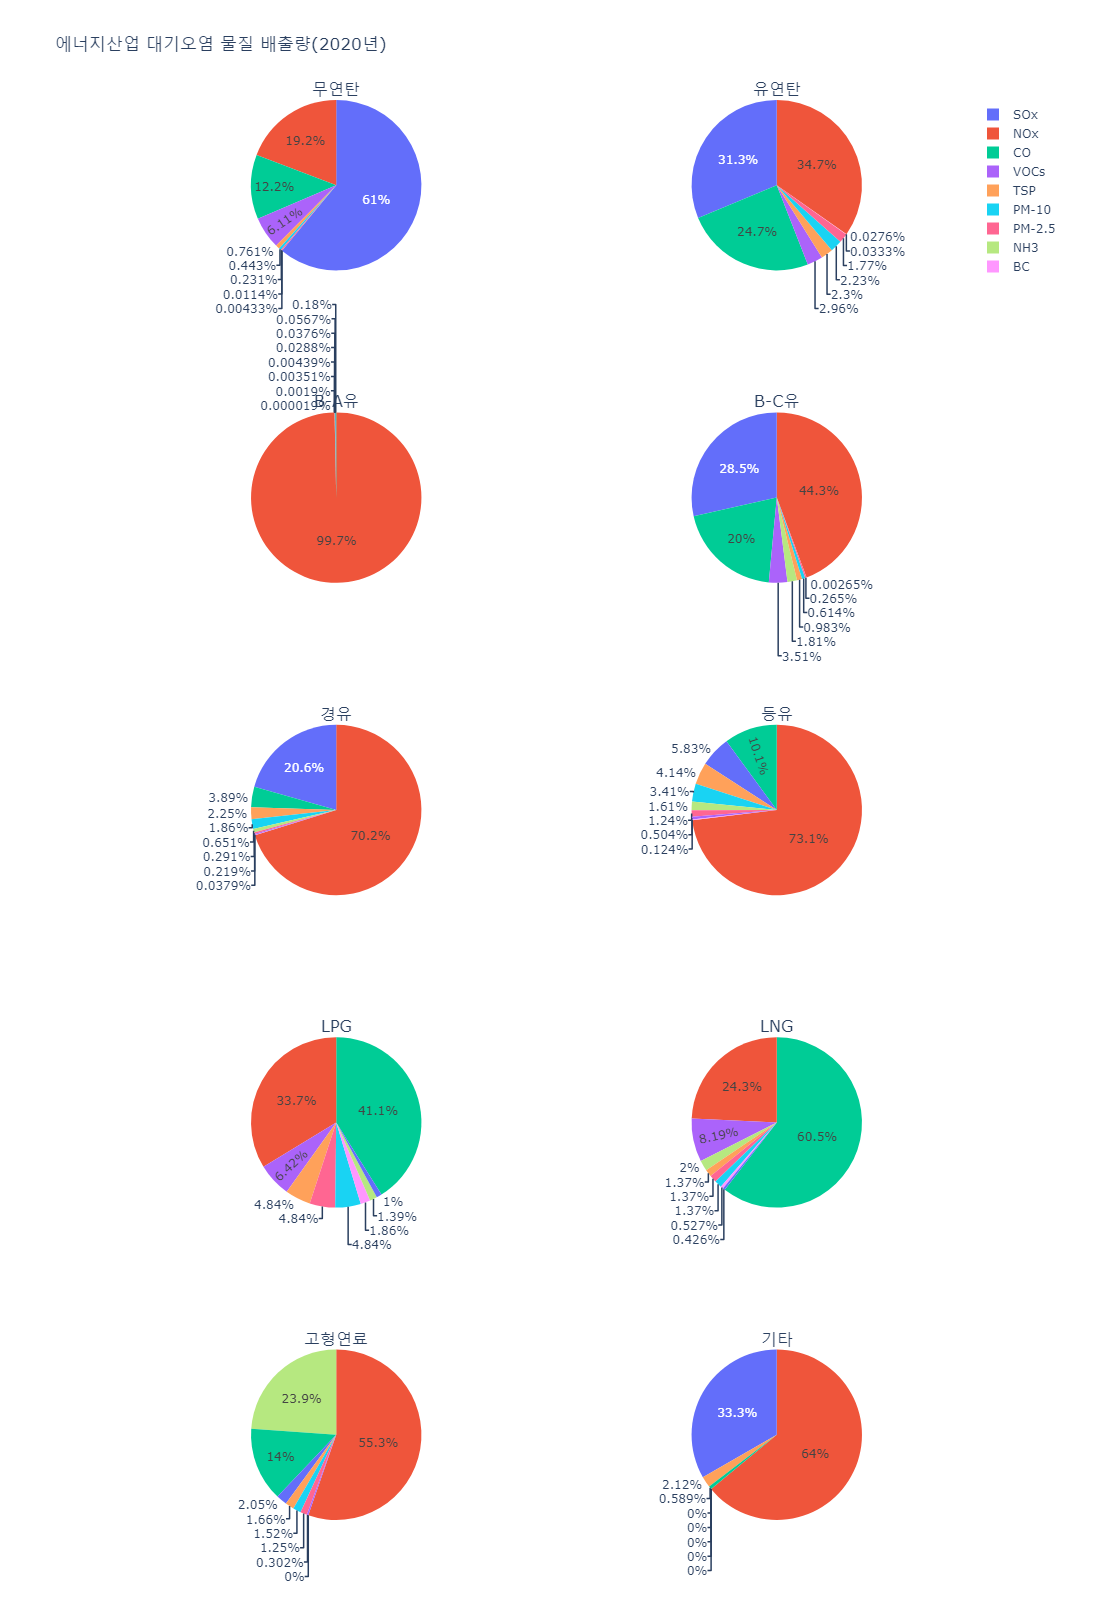

In [39]:
fig = make_subplots(rows=5, cols=2, subplot_titles=df_fire_total['소분류'].unique(),
                    specs=[[{'type': 'pie'} ,{'type': 'pie'}],
                           [{'type': 'pie'} ,{'type': 'pie'}],
                           [{'type': 'pie'} ,{'type': 'pie'}],
                           [{'type': 'pie'} ,{'type': 'pie'}],
                           [{'type': 'pie'} ,{'type': 'pie'}]])


for i, category in enumerate(df_fire_total['소분류'].unique()):
    print(f" i = {i}, category = {category}")
    sub_df = df_fire_total[df_fire_total['소분류'] == category]
    # 파이 차트 생성 및 추가
    trace = go.Pie(labels=sub_df.columns[2:], values=sub_df.iloc[0, 2:])
    fig.add_trace(trace, row=(i // 2) + 1, col=(i % 2) + 1)

fig.update_layout(title='에너지산업 대기오염 물질 배출량(2020년)'
                 ,width=1000,
                  height=1600)

fig.show()

In [34]:
sub_df.columns[2:]

Index(['TSP', 'PM-2.5', 'PM-10', 'SOx', 'NOx', 'VOCs', 'NH3', 'CO', 'BC'], dtype='object')

In [35]:
sub_df.iloc[0, 2:]

TSP        140556.24992
PM-2.5              0.0
PM-10               0.0
SOx       2203712.71622
NOx       4238323.27692
VOCs                0.0
NH3                 0.0
CO            38974.752
BC                  0.0
Name: 10, dtype: object

In [ ]:
df_fire_total

In [ ]:
### 산업별 대기오염 물질 배출 정보
df

In [31]:
df_list = df['대분류'].unique()
df_list

array(['에너지산업 연소', '비산업 연소', '제조업 연소', '생산공정', '에너지수송 및 저장', '유기용제 사용',
       '도로이동오염원', '비도로이동오염원', '폐기물처리', '농업', '기타 면오염원', '비산먼지', '생물성 연소'],
      dtype=object)

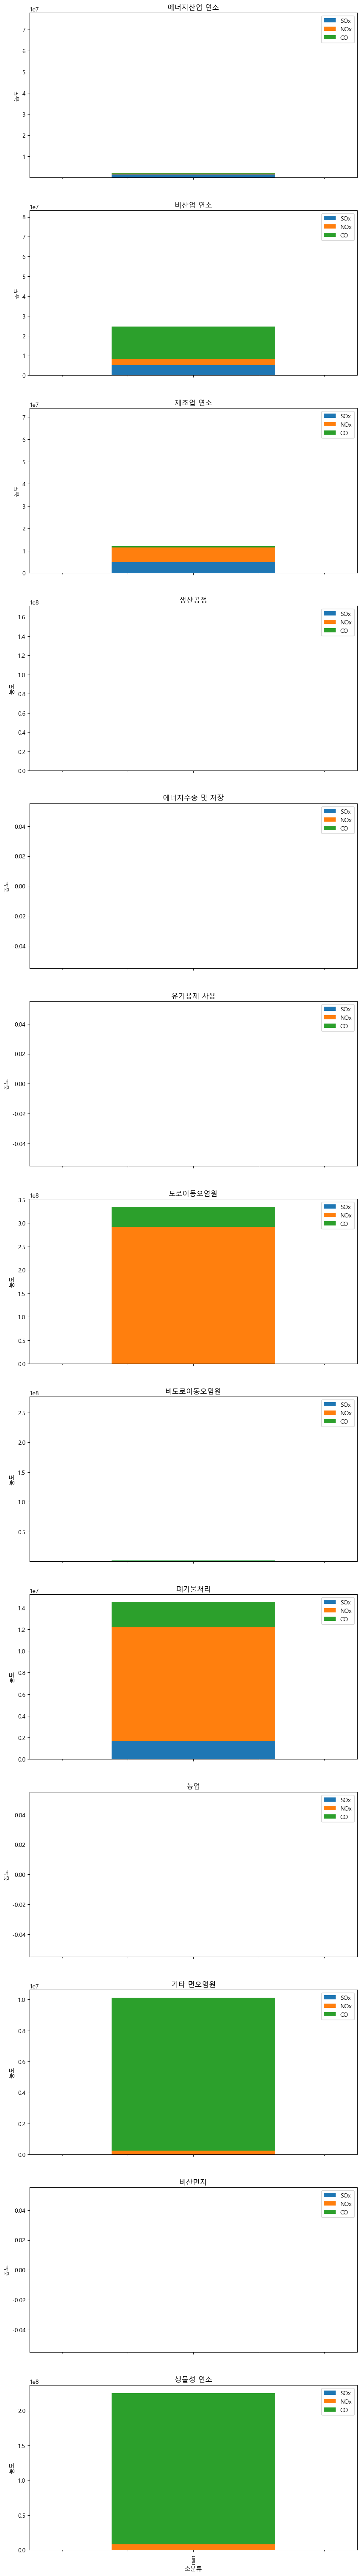

In [32]:

# 대분류 리스트 추출
df_list = df['대분류'].unique()

# 대분류별로 서브플롯 생성
fig, axes = plt.subplots(len(df_list), 1, figsize=(10, 6 * len(df_list)), sharex=True)

for i, 대분류 in enumerate(df_list):
    # 대분류에 해당하는 데이터 추출
    subset = df[df['대분류'] == 대분류]
    
    # 서브플롯에 소분류별 막대 그래프 플로팅
    subset.plot(kind='bar', x='소분류', y=['SOx', 'NOx', 'CO'], ax=axes[i], stacked=True)
    axes[i].set_title(대분류)
    axes[i].set_ylabel('농도')

plt.xlabel('소분류')
plt.show()

In [ ]:
### 대분류로 그룹화
df_group = df.groupby(["대분류"], as_index = False)
df_group

In [ ]:
df_groups=df_group.head(1)

In [ ]:
df_groups

In [ ]:
df_groups.info()

In [ ]:
df_groups.fillna(0)

In [ ]:
df_groups.iloc[:,:2]

In [ ]:
df_group_str = df_groups.iloc[:, 2:]

In [ ]:
df_group_str

In [ ]:
df_group_float=df_group_str.astype(float)

In [ ]:
df_group_float.info()

In [ ]:
merged_df = pd.concat([df_groups.iloc[:,:2], df_group_float], axis=1)

In [ ]:
merged_df

In [ ]:
# labels = ["US", "China", "European Union", "Russian Federation", "Brazil", "India",
#           "Rest of World"]

# # Create subplots: use 'domain' type for Pie subplot
# fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
# fig.add_trace(go.Pie(labels=labels, values=[16, 15, 12, 6, 5, 4, 42], name="GHG Emissions"),
#               1, 1)
# fig.add_trace(go.Pie(labels=labels, values=[27, 11, 25, 8, 1, 3, 25], name="CO2 Emissions"),
#               1, 2)

# # Use `hole` to create a donut-like pie chart
# fig.update_traces(hole=.4, hoverinfo="label+percent+name")

# fig.update_layout(
#     title_text="Global Emissions 1990-2011",
#     # Add annotations in the center of the donut pies.
#     annotations=[dict(text='GHG', x=0.18, y=0.5, font_size=20, showarrow=False),
#                  dict(text='CO2', x=0.82, y=0.5, font_size=20, showarrow=False)])
# fig.show()

In [ ]:

# 데이터 설정
categories = df_fire_total['대분류'].unique()  # 대분류 카테고리
labels = df_fire_total['소분류']  # 소분류 레이블
values = df_fire_total['TSP']  # TSP 값

# 서브플롯 생성
fig = make_subplots(rows=1, cols=3, subplot_titles=categories, specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]])

# 각 서브플롯에 파이 차트 추가
for i, category in enumerate(categories):
    sub_df = df_fire_total[df_fire_total['대분류'] == category]
    fig.add_trace(go.Pie(labels=sub_df['소분류'], values=sub_df['TSP']), row=1, col=i+1)

# 레이아웃 설정
fig.update_layout(title='서브플롯 원형 차트')

# 차트 출력
fig.show()